In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler

import torchvision.datasets as dset
import torchvision.transforms as T

import numpy as np

In [3]:
import os

from PIL import Image

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

In [4]:
class DogDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        for breed_dir in os.listdir(root_dir):
            breed_path = os.path.join(root_dir, breed_dir)
            if os.path.isdir(breed_path):
                for image_file in os.listdir(breed_path):
                    image_path = os.path.join(breed_path, image_file)
                    self.image_paths.append(image_path)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image

In [5]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [6]:
dataset_dir = '/Users/chenxiaojie/Downloads/Images'
dataset = DogDataset(dataset_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)


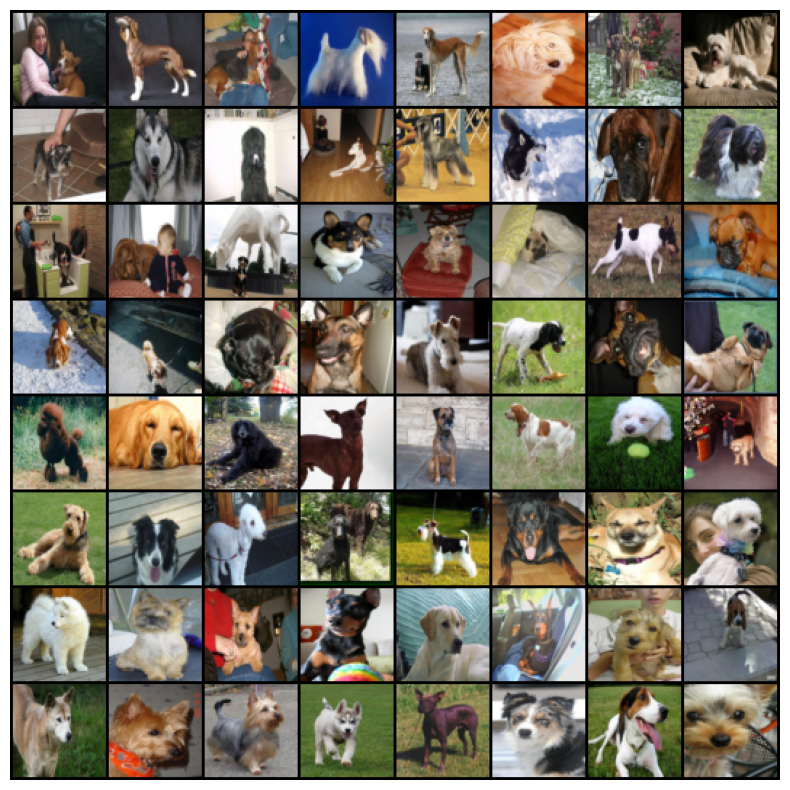

In [11]:
import matplotlib.pyplot as plt
import torchvision.utils as vutils

# Get a batch of images from the dataloader
dataiter = iter(dataloader)
images = next(dataiter)


# Create a grid from the batch of images
img_grid = vutils.make_grid(images, nrow=8, padding=2, normalize=True)

# Display the image grid
plt.figure(figsize=(10, 10))
plt.imshow(np.transpose(img_grid, (1, 2, 0)))
plt.axis('off')
plt.show()